# Basic Statistical Analysis

What follows is a quick introduction or review to basic statistical analysis, along with how to do them in Python (though there are many variations).

Let's make some random data and consider the following
* Central Tendency
* Distributions and Variation
* Joint Variation

## Let's make some data

In [49]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# scipy has a number of stats based tools
from scipy import stats
from scipy.stats import norm

# this is python's own statistics library
from statistics import *

In [50]:
# Let's make some random data... we'll work with the same "normal" distribution

my_random_data = norm.rvs(0.0, 2.5, size=1000000)

# let's make a pandas Series from our data as well for later.

my_random_series = pd.Series(my_random_data)

In [51]:
#print(my_random_data)
print("\nLength of our data: {}".format(len(my_random_data)))
print("\nType: {}".format(type(my_random_data)))


Length of our data: 1000000

Type: <class 'numpy.ndarray'>


In [52]:
my_random_series.head()

0   -1.867683
1    0.435285
2   -3.904536
3    0.020165
4   -0.052820
dtype: float64

## Central Tendency

Measures of "Central Tendency" are measures of the center point or "typical value" of a distribution of values.

### Mean

The Arithmetic mean (or average) of a population $A$ of $n$ variables $a_i$ is defined as: 
$${A = \frac{1}{n} \sum_{i=1}^n{a_i}}$$ 

In [53]:
# from statistics
mean(my_random_data)

-0.0031567078625268303

In [54]:
# mean in numpy
my_random_data.mean()

-0.003156707862526831

In [55]:
# from our Pandas series
my_random_series.mean()

-0.0031567078625267873

In [56]:
data = np.array([1, 2, 3, 4, 5, 6])

In [57]:
data.mean()

3.5

In [58]:
%timeit mean(my_random_data)

1.41 s ± 46.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [59]:
%timeit my_random_data.mean()

968 µs ± 79.6 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [60]:
%timeit my_random_series.mean()

1.14 ms ± 5.94 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


### Median

Median is the midpoint value of a population. Given a set $N = { 1, 2, 4, 6, 7, 9, 20 }$, the median $M = 6$.

In [61]:
arr = np.asarray((500000, 2, 4, 6, 7, 9, 1))

In [62]:
type((500000, 2, 4, 6, 7, 9, 1))

tuple

In [63]:
# median from native python statistics package:
median(arr)

6

In [64]:
# in python
np.median(arr)

6.0

In [65]:
# with our data
np.median(my_random_data)

-0.0064191283719272265

In [66]:
# median in pandas
my_random_series.median()

-0.0064191283719272265

### Mode

Mode is the value that occurs the most frequently. Given a set $N = { 1, 2, 2, 6, 6, 9, 9, 9, 18, 18, 20 }$, the mode $M = 9$.

In [67]:
# mode from the statistics package
a = np.asarray((1, 2, 2, 6, 6, 9, 9, 9, 18, 18, 20))
mode(a)

9

In [68]:
# our data doesn't have a mode since we have made all values equally likely so we won't test these, but the functions are available.

## Variation

### Distributions

Definition: A __distribution__ is a function that describes the probability of different outcomes of an experiment.  The graph below describes frequency of various values occurring, given in values from the most central values (mean).

<div style="text-align:center"><img src="images/normaldist.png"></div>

In this chart, the mean value is 0. In the case of the normal distribution as here, 0 is also the most frequent value. You can see the probabilities of occurance drop as you get farther from the mean.


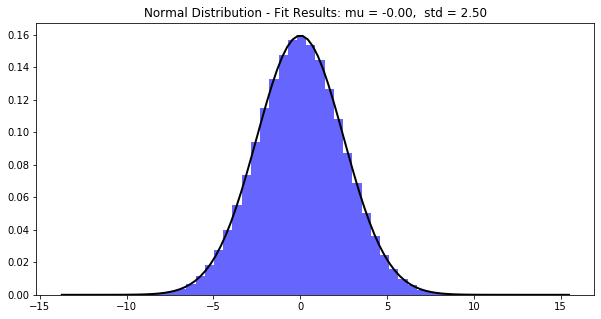

In [71]:
# Let's fit a normal distribution to our data
mu, std = norm.fit(my_random_data)

fig, ax = plt.subplots(1, 1, figsize=(10, 5))

# plot our data
ax.hist(my_random_data, bins=50, density=True, alpha=0.6, color='blue')

# plot the PDF
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
ax.plot(x, p, 'k', linewidth=2)

plt.title("Normal Distribution - Fit Results: mu = {:.2f},  std = {:.2f}".format(mu, std))
plt.show()

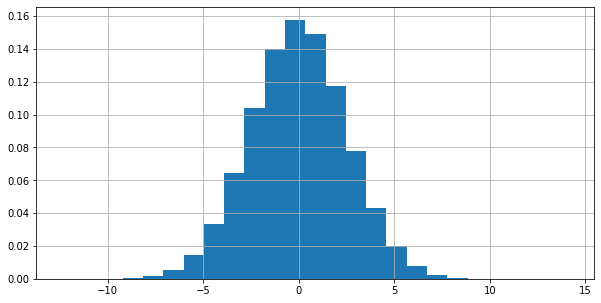

In [72]:
# you can also do this in Pandas
my_random_series.hist(bins=25, density=True, figsize=(10, 5))

### Variance

Variance, denoted by $Var(X)$ or $\sigma^2$ is a measure of how far away the values in a population are from the mean:

$${Var(X) = \frac{1}{n} \sum_{i=1}^n{(x_i-\mu)^2}}$$ 

In [73]:
# statistics
variance(my_random_data)

6.261336993984883

In [74]:
# pandas
my_random_series.var()

6.26133699398487

In [75]:
# numpy
my_random_data.var()

6.261330732647889

Wait. What? numpy is different!  Why?? Without going too deep into the statistics, there is a concept of "degrees of freedom". Degrees of freedom (ddof) = 1 is used to provide an unbiased estimator of the theoretical population. ddof = 0 is the estimator for the variance of the random variables. 

Numpy uses ddof = 0 by default. You can tell it to use ddof = 1 instead. This defines the **sample** variance as:

$${Var(X) = \frac{1}{n-1} \sum_{i=1}^n{(x_i-\bar{x})^2}}$$ 

Note the difference in the "mean"; the population variance $\sigma$ uses the "true" mean $\mu$.  The sample variance uses the sample average $\bar{x}$.

In [76]:
my_random_data.var(ddof=1)

6.261336993984883

### Standard Deviation

The **population** standard deviation, denoted by $\sigma$ is the square root of the variance:

$$\sigma = \sqrt{{\frac{1}{n} \sum_{i=1}^n{(x_i-\mu)^2}}}$$ 

If we use ddof=1 then we get the **sample** standard deviation $s$:

$$s = \sqrt{{\frac{1}{n-1} \sum_{i=1}^n{(x_i-\bar{x})^2}}}$$ 

In [77]:
# standard deviation
stdev(my_random_data)

2.502266371509013

In [78]:
# numpy
my_random_data.std(ddof=1)

2.502266371509013

In [79]:
# pandas
my_random_series.std()

2.5022663715090108

### The Intuition of Standard Deviation and Variance

So what does it mean that a population of data has a larger standard deviation than another? 

Let's create two data sets with the same mean but different standard deviations.

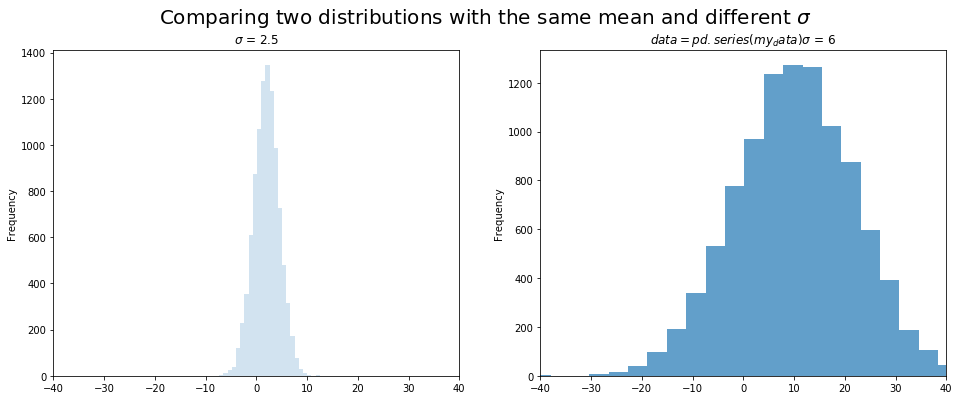

In [89]:
small_std = pd.Series(norm.rvs(2.0, 2.5, size=10000))
large_std = pd.Series(norm.rvs(10.0, 12.0, size=10000))

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16,6))
       
small_std.plot(kind="hist", ax=ax1, bins=25, title="$\sigma$ = 2.5", xlim=(-40,40), alpha=0.2)
large_std.plot(kind="hist", ax=ax2, bins=25, title="$data = pd.series(my_data)\sigma$ = 6", xlim=(-40,40), alpha=0.7)

fig.suptitle("Comparing two distributions with the same mean and different $\sigma$", fontsize="20")
plt.show()

## Joint Variability

Very often we want to be able to see how values change together, jointly. We'll call these measures of __joint variability__.

### Covariance and Correlation

__Covariance__ indicates the __direction__ of the linear relationship between variables. 

__Correlation__ on the other hand measures both the __strength__ and __direction__ of the linear relationship between two variables.

In [81]:
# statsmodels
import statsmodels.api as sm

# let's get our copper data from last week
copper = sm.datasets.copper.load_pandas().data
years = np.arange(1951, 1976)
copper.index = years

In [82]:
copper.head()

,WORLDCONSUMPTION,COPPERPRICE,INCOMEINDEX,ALUMPRICE,INVENTORYINDEX,TIME
1951,3173.0,26.56,0.70,19.76,0.98,1.0
1952,3281.1,27.31,0.71,20.78,1.04,2.0
1953,3135.7,32.95,0.72,22.55,1.05,3.0
1954,3359.1,33.90,0.70,23.06,0.97,4.0
1955,3755.1,42.70,0.74,24.93,1.02,5.0


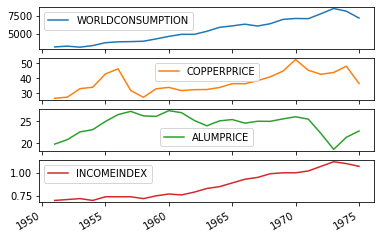

In [83]:
# let's plot some of this data to see what it looks like

_ = copper[['WORLDCONSUMPTION', 'COPPERPRICE', 'ALUMPRICE', 'INCOMEINDEX']].plot(subplots=True)

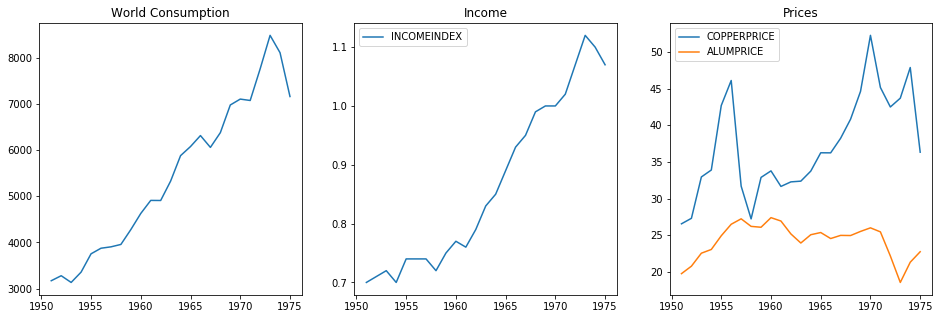

In [84]:
# hmm that's not very readable. Let's split it.

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16,5))
copper['WORLDCONSUMPTION'].plot(ax=ax1, title="World Consumption")
copper[['INCOMEINDEX']].plot(ax=ax2, title="Income")
copper[['COPPERPRICE', 'ALUMPRICE']].plot(ax=ax3, title="Prices")


Some of these look like they might move together, though some of them less so. We can use __covariance__ and __correlation__ to quantify these relationships.

#### Covariance

__Population Covariance__

$$Cov(X,Y) = \frac{1}{n}\sum_{i=1}^n{(x_i - \mu_x)(y_i - \mu_y)}$$

__Sample Covariance__

$$q_{x,y} = \frac{1}{n-1}\sum_{i=1}^n{(x_i - \bar{x})(y_i - \bar{y})}$$

__Population Correlation__

$$Corr(X,Y) = \frac{Cov(X,Y)}{\sigma_X\sigma_Y}$$

__Sample Correlation__

$$r(X,Y) = \frac{\frac{1}{n-1}\sum_{i=1}^n{(x_i - \bar{x})(y_i - \bar{y})}}{s_xs_y}$$

Let's first look at the covariance and correlation of our data, starting with WORLDCONSUMPTION and INCOMEINDEX which look like they move together:

In [85]:
# in pandas, you calculate the covariance buy calling Series1.corr(Series2)
print("Covariance of WORLDCONSUMPTION and INCOMEINDEX: {}".format(copper.WORLDCONSUMPTION.cov(copper.INCOMEINDEX)))
print("Correlation of WORLDCONSUMPTION and INCOMEINDEX: {}".format(copper.WORLDCONSUMPTION.corr(copper.INCOMEINDEX)))

Covariance of WORLDCONSUMPTION and INCOMEINDEX: 235.7199533333333
Correlation of WORLDCONSUMPTION and INCOMEINDEX: 0.9779588757690936


Those seem very highly correlated!  Let's look at some other examples.

In [86]:
print("Covariance of COPPERPRICE and ALUMPRICE: {}".format(copper.COPPERPRICE.cov(copper.ALUMPRICE)))
print("Correlation of COPPERPRICE and ALUMPRICE: {}".format(copper.COPPERPRICE.corr(copper.ALUMPRICE)))

Covariance of COPPERPRICE and ALUMPRICE: 0.46337416666666553
Correlation of COPPERPRICE and ALUMPRICE: 0.02847764942413591


In [87]:
print("Covariance of COPPERPRICE and ALUMPRICE: {}".format(copper.COPPERPRICE.cov(copper.ALUMPRICE)))
print("Correlation of COPPERPRICE and ALUMPRICE: {}".format(copper.COPPERPRICE.corr(copper.ALUMPRICE)))

Covariance of COPPERPRICE and ALUMPRICE: 0.46337416666666553
Correlation of COPPERPRICE and ALUMPRICE: 0.02847764942413591


In [88]:
short_copper = copper.loc[1951:1957].COPPERPRICE
short_alum = copper.loc[1951:1957].ALUMPRICE
print(short_copper.cov(short_alum))
print(short_copper.corr(short_alum))

14.51420714285714
0.6983650706303188


For more detail on covariance and correlation here is a nice description: [Correlation and Covariance](https://towardsdatascience.com/let-us-understand-the-correlation-matrix-and-covariance-matrix-d42e6b643c22).

## Appendix
Code for some of the charts

In [ ]:
# How did we make this chart?
from scipy.stats import norm

# numpy's randn function generates data that is "normally" distributed.
x = np.linspace(norm.ppf(0.01),
                norm.ppf(0.99), 100)


plt.plot(x, norm.pdf(x), 'r-', label='Normal Distribution')
plt.title("A Normal Distribution")
plt.show()